## HYPOTHESIS TESTING — EFFECT OF AN INTERVENTION ON CONFIDENCE IN STATISTICS


You're working as an educational researcher evaluating the impact of academic support 
programmes on student outcomes. Recently, your department implemented an intervention 
programme designed to improve students’ confidence in their ability to cope with statistics — a 
common challenge area for many learners. 

To assess the effectiveness of the programme, a group 
of students were invited to participate in the intervention. Their confidence levels were measured 
at three key points:

• Time 1 (confid1): Prior to the intervention

• Time 2 (confid2): Immediately after completing the intervention 

• Time 3 (confid3): Three months after the intervention, to assess retention 

The Confidence in Coping with Statistics Scale, a self-report measure with scores ranging from 10 
to 40 (higher scores indicate higher confidence), was used at each time point. You've collected the 
data and are now tasked with performing an appropriate statistical analysis to determine whether 
the intervention had a significant effect on the students’ confidence levels over time. 




Research Question 

Did students’ confidence in coping with statistics change across the three time periods (before, 
immediately after, and three months after the intervention)?


Task 

Derive appropriate hypotheses from the research question and test them using a repeated measures 
ANOVA.

In [6]:
# import necessary libraries and load dataset
import pandas as pd
import pingouin as pg
from statsmodels.stats. multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

stud_data = pd.read_excel(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\confid.xlsx")
confd_data = stud_data.loc[:, ["id", "confid1","confid2", "confid3"]]
confd_data

# reshape data to perform repeated measures anova
melted_confd = pd.melt(frame = confd_data,
        id_vars= "id",
        value_vars = ["confid1", "confid2", "confid3"],
        var_name = "Time",
        value_name = "Confidence score")

melted_confd





,id,Time,Confidence score
0,4,confid1,15
1,10,confid1,14
2,9,confid1,12
3,3,confid1,11
4,12,confid1,16
...,...,...,...
85,28,confid3,29
86,22,confid3,30
87,24,confid3,30
88,16,confid3,32


Research Hypothesis 

H₀: There is no difference in students confidence across the three time period (before, immediately after and three months after) the intervention.

H₁: Students confidence in coping with statistics increased that before, after the intervention

In [2]:
# perform rm_anova using pg
result = pg.rm_anova(data = melted_confd,
            dv = "Confidence score",
            within = "Time",
            subject = "id",
            effsize = "np2",
            detailed = True)

result

#Since sphericity is False, we report the p-GG-corrected and then 
# multiply DF by eps.4

if result.loc[0, "sphericity"] == False:
    result["DF"] = result.loc[0,"eps"] * result["DF"]

result

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Time,546.466667,1.420850,273.233333,33.186235,2.468359e-10,5.729919e-08,0.533659,0.710425,False,0.592392,0.000655
1,Error,477.533333,41.204662,8.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# the p value here, p-GG is less than 0.05, so, we reject null hypothesis.
# then cntinue to posthoc test

post_hoc_test = pg.pairwise_tests(data = melted_confd,
                  dv = "Confidence score",
                  within = "Time",
                  subject = "id",
                  correction = "bof")
post_hoc_test

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Time,confid1,confid2,True,True,-3.302642,29.0,two-sided,2.549467e-03,14.579,-0.516068
1,Time,confid1,confid3,True,True,-7.247201,29.0,two-sided,5.575949e-08,2.592e+05,-1.126438
2,Time,confid2,confid3,True,True,-7.077493,29.0,two-sided,8.716303e-08,1.707e+05,-0.578607


In [5]:
summary_statistics = melted_confd.groupby("Time")["Confidence score"].agg(["mean", "std"]).round(2)
summary_statistics

,mean,std
Time,,
confid1,19.00,5.37
confid2,21.87,5.59
confid3,25.03,5.20


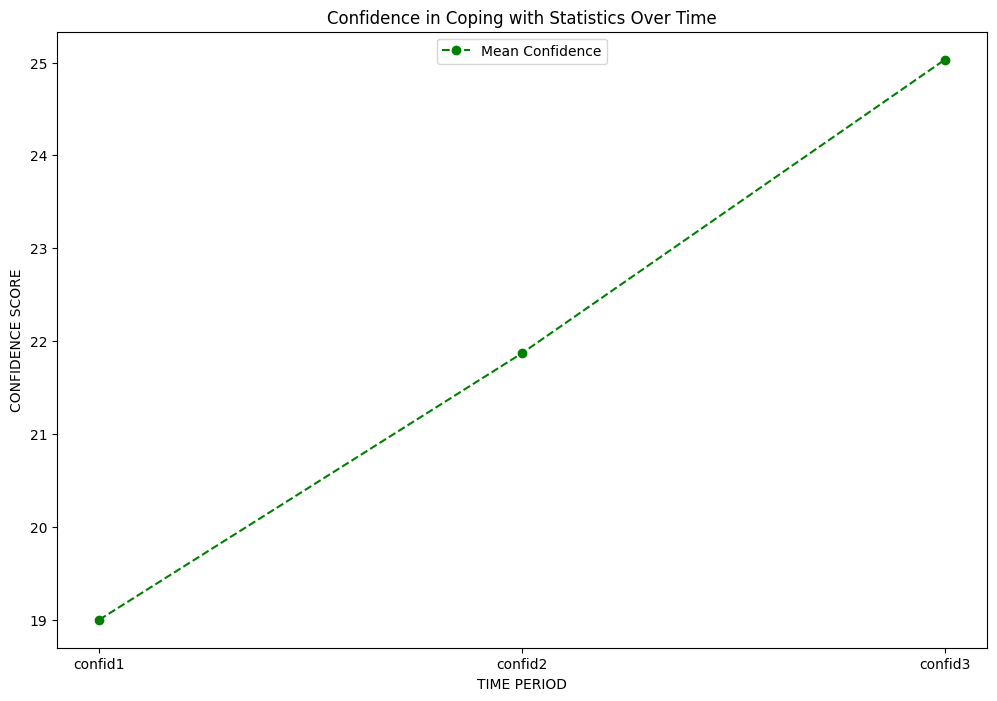

In [22]:
plt.figure(figsize= [12,8])
plt.plot(summary_statistics.index, summary_statistics["mean"], "--g",
         marker = 'o',  label='Mean Confidence')

plt.xlabel("TIME PERIOD")
plt.ylabel("CONFIDENCE SCORE")
plt.title("Confidence in Coping with Statistics Over Time")
plt.legend(loc = "upper center")
plt.show()



###  Analysis Result

A repeated measures ANOVA was conducted to determine changes in students' confidence in coping with statistics across three time points: before the intervention (confid1), immediately after (confid2), and three months later (confid3). 

Mauchly’s test indicated that the assumption of sphericity was violated, W = 0.59, p = .001; therefore, Greenhouse-Geisser corrections were applied (ε = 0.71).

The analysis revealed a significant main effect of time, F(1.42, 41.20) = 33.19, p < .001, η²ₚ = .53, which indicates a large effect size.


Post hoc comparisons using Bonferroni correction showed:

- A significant increase in confidence from confid1 (M = 19.00, SD = 5.37) to confid2 (M = 21.87, SD = 5.59), p = .003

- A significant increase from confid1 to confid3 (M = 25.03, SD = 5.20), p < .001

- A significant increase from confid2 to confid3, p < .001


These results as also shown in the line graph above suggest that the intervention was effective in significantly improving students’ confidence in coping with statistics over time. Confidence continued to rise even three months post-intervention, which thereby indicates sustained benefits.
